# 可视化

In [2]:
import torch
from torch.autograd import Variable
from torch import nn as nn
from torchvision import models
from torchvision import transforms
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
vgg = models.vgg16(pretrained=True)

In [4]:
class LayerActivations():
    features = None
    def __init__(self, model, layer_num):
        self.hook = model[layer_num].register_forward_hook(self.hook_fn)
    def hook_fn(self, module, input, output):
        self.features = output.cpu()
    def remove(self):
        self.hook.remove()

In [44]:
conv_out = LayerActivations(vgg.features,1)

In [45]:
from PIL import Image

In [46]:
img = Image.open('example.jpg')

In [47]:
train_transform = transforms.Compose([transforms.Resize((224,224))
                                       ,transforms.RandomHorizontalFlip()
                                       ,transforms.RandomRotation(0.2)
                                       ,transforms.ToTensor()
                                       ,transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                      ])

In [48]:
def imshow(inp,cmap=None):
    import numpy as np
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp,cmap)

In [49]:
image = Image.open('example.jpg')

In [50]:
image = train_transform(image)

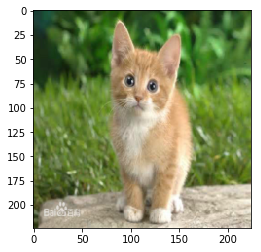

In [51]:
imshow(image)

In [108]:
conv_out = LayerActivations(vgg.features,1)

In [109]:
o = vgg(Variable(image.unsqueeze(0)))

In [110]:
conv_out.remove()

In [111]:
act = conv_out.features

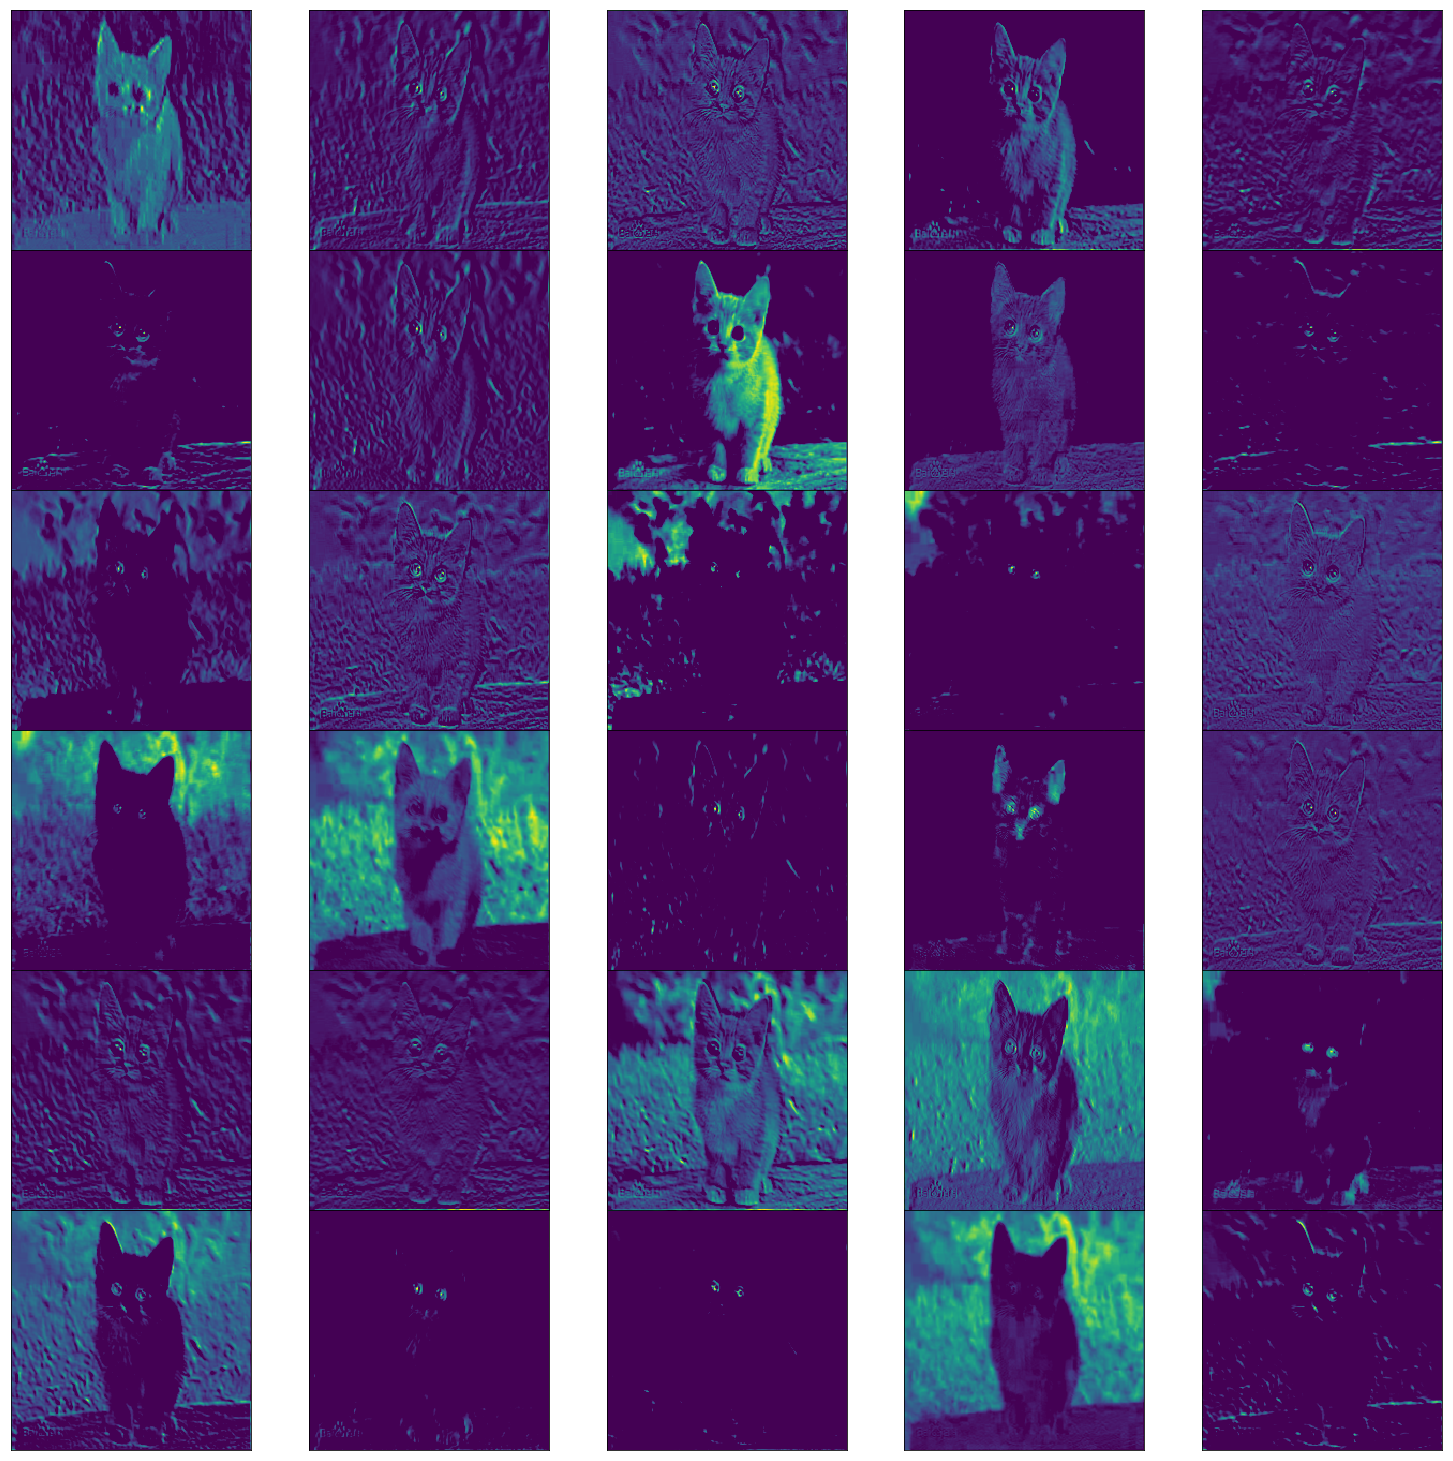

In [112]:
fig = plt.figure(figsize=(20,50))
fig.subplots_adjust(left=0,right=1,bottom=0,top=0.8,hspace=0,wspace=0.2)
for i in range(30):
    ax = fig.add_subplot(12,5,i+1,xticks=[],yticks=[])
    ax.imshow(act[0][i].data.numpy())